In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


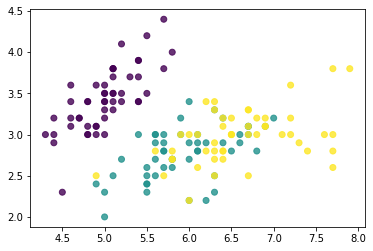

In [2]:
iris = load_iris()

X = iris.data
y = iris.target
print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [3]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("Train_set:", X_train.shape)
print("Test_set", X_test.shape)

Train_set: (120, 4)
Test_set (30, 4)


Text(0.5, 1.0, 'Test_set')

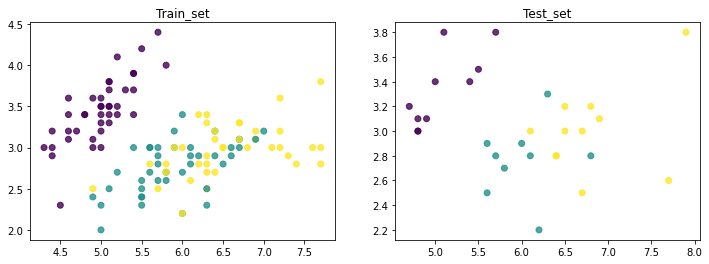

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, alpha=0.8)
plt.title("Train_set")
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title("Test_set")

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("Train_score:",model.score(X_train, y_train))
print("Test_score:",model.score(X_test, y_test))

Train_score: 0.95
Test_score: 1.0


In [14]:
# Amelioraton du modele en utilisant la cross_validation
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

array([0.95833333, 0.95833333, 0.83333333, 1.        , 0.95833333])

In [16]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9416666666666667

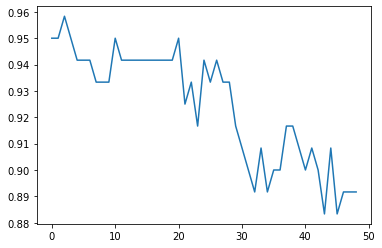

In [17]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

In [18]:
# En realite on a pas besoin de faire coe precedemment car dans sklearn ya deja validation_curve qui gere sa
from sklearn.model_selection import validation_curve

C:\Users\Armand Forent\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


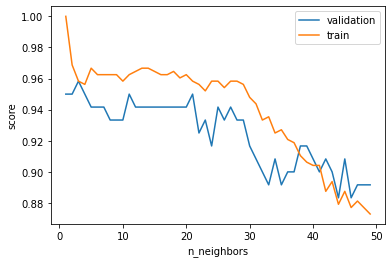

In [20]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, "n_neighbors", k, cv=5)
plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [21]:
# Gridsearchcv permet de trouver les bons parametres du model en comparant chaque combinaison du modele par crossvalidation
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'n_neighbors':np.arange(1, 20), 'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [24]:
grid.best_score_

0.9666666666666666

In [25]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 14}

In [26]:
model = grid.best_estimator_ # pour sauvegarder le meilleur model

In [28]:
model.score(X_test, y_test)

1.0

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, model.predict(X_test))

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Courbes d'apprentissage

In [31]:

from sklearn.model_selection import learning_curve

[19 38 57 76 96]


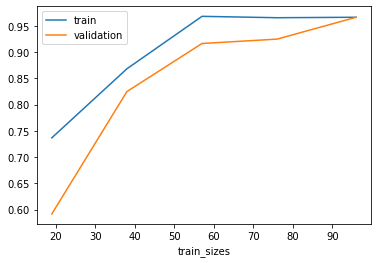

In [32]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [ ]:
# Exercice
# Pour le dataset du titanic traite precedemment:
# 1. Creer un Train_set et un Test_set. Entrainer puis evaluer
# 2. Avec GridSearch, trouver les meilleurs hyper-parametres n_neghbors, metrics et weights
# 3. Est-ce-que collecter plus de donnees serait utile?
# 4. Partage tes resultats en commentaire !:)